### 导论Homework4
#### 10235501435张凯诚


##### 题目：寻找关键用户和分析社交关系
问题:
1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。
3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

1.a 社交关系网络的字典表示法： {'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 

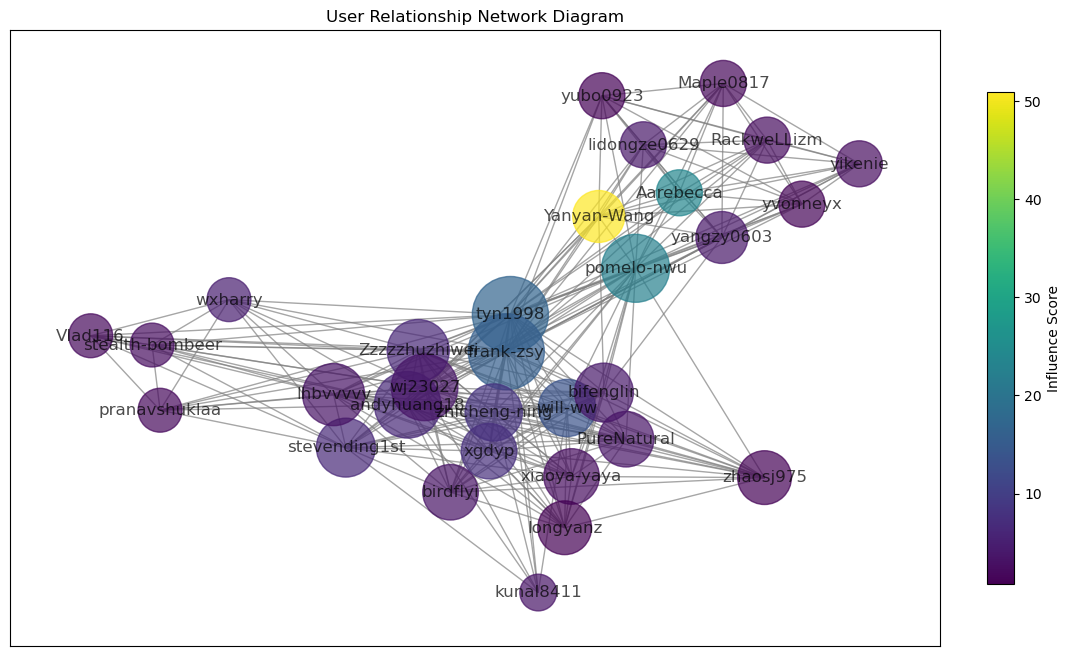

In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 从 data.json 文件中加载数据
with open('hw4_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
nodes = data['nodes']  
edges = data['edges']  

# 创建影响力分数字典
influence_scores = {node[0]: node[1] for node in nodes}

# 1.a 构建邻接字典表示社交关系网络
adjacency = {}

for edge in edges:
    user1, user2, weight = edge
    adjacency.setdefault(user1, {})[user2] = weight
    adjacency.setdefault(user2, {})[user1] = weight  # 无向图，双向添加

print("1.a 社交关系网络的字典表示法：", adjacency)

# 社交网络构建与分析
# 1.b 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
direct_friends = {user: list(friends.keys()) for user, friends in adjacency.items()}

print("1.b 每个用户的直接朋友：", direct_friends)

# 统计与度中心性分析
# 2.a 计算每个用户的度数，列出度数最多的前 5 个用户
degrees = {user: len(friends) for user, friends in adjacency.items()}
top_5_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n2.a 度数最多的前 5 个用户及其朋友数量：")
for user, degree in top_5_degree:
    print(f"{user}: {degree} 个朋友")

# 2.b 找出影响力最高的前 5 个用户
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n2.b 影响力得分最高的前 5 个用户：")
for user, score in top_5_influence:
    print(f"{user}: 影响力得分 {score}")

# 2.c 综合考虑影响力分数和朋友数量，列出最有影响力的用户
# 归一化影响力分数和度数
max_influence = max(influence_scores.values())
max_degree = max(degrees.values())

combined_scores = {}
for user in adjacency.keys():
    normalized_influence = influence_scores[user] / max_influence
    normalized_degree = degrees[user] / max_degree
    # 综合得分，影响力得分的 50%和朋友数量的 50%
    combined_score = 0.5 * normalized_influence + 0.5 * normalized_degree
    combined_scores[user] = combined_score

# 找出综合得分最高的用户（可能有多个）
max_combined_score = max(combined_scores.values())
top_users = [user for user, score in combined_scores.items() if score == max_combined_score]

print("\n2.c 综合得分(影响力得分和朋友数量各占50%） 最高的用户：")
for user in top_users:
    print(f"{user}: 综合得分 {max_combined_score:.4f}")

# 推荐新朋友
# 3.a 为用户 Yanyan-Wang 找出最有可能成为新朋友的用户
target_user = "Yanyan-Wang"
user_friends = set(direct_friends[target_user])

# 找出朋友的朋友
friends_of_friends = set()
for friend in user_friends:
    friends_of_friends.update(direct_friends[friend])

# 排除用户自己和其直接朋友
potential_friends = friends_of_friends - user_friends - {target_user}

# 计算共同朋友数量
mutual_friends_count = {}
for potential_friend in potential_friends:
    mutual_friends = user_friends.intersection(direct_friends[potential_friend])
    mutual_friends_count[potential_friend] = len(mutual_friends)

# 按共同朋友数量排序
sorted_recommendations = sorted(mutual_friends_count.items(), key=lambda x: x[1], reverse=True)

max_mutual_count = sorted_recommendations[0][1] if sorted_recommendations else 0
recommended_friends = [potential_friend for potential_friend, mutual_count in sorted_recommendations if mutual_count == max_mutual_count]

print(f"\n3.a 为用户 {target_user} 推荐的新朋友：")
for potential_friend in recommended_friends:
    print(f"{potential_friend}，理由：有最多的共同朋友，一共有{max_mutual_count} 个共同的朋友。")

#3.b 找出与 Yanyan-Wang 连接强度最高的 5 个用户
# 收集所有用户
all_users = set(adjacency.keys())

# 计算 Yanyan-Wang 与所有其他用户的连接强度
connection_strengths = {}

for other_user in all_users:
    if other_user == target_user:
        continue
    # 如果是直接朋友，使用边的权重
    if other_user in adjacency[target_user]:
        connection_strengths[other_user] = adjacency[target_user][other_user]
    else:
        # 如果不是直接朋友，考虑通过共同朋友的间接连接
        strength = 0
        for friend in user_friends:
            if other_user in adjacency[friend]:
                strength += adjacency[friend][other_user] * 0.5  # 间接连接，权重减半
        if strength > 0:
            connection_strengths[other_user] = strength

# 找出连接强度最高的前 5 个用户
top_5_connections = sorted(connection_strengths.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n3.b 与 {target_user} 连接强度最高的前 5 个用户：")
for other_user, strength in top_5_connections:
    print(f"{other_user}: 连接强度 {strength}")

# 网络图的可视化
# 4.a & 4.b 绘制用户关系网络图
G = nx.Graph()

# 添加节点并设置影响力得分为属性
for node, influence in influence_scores.items():
    G.add_node(node, influence=influence)

# 添加边并设置权重
for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 使用 spring 布局
pos = nx.spring_layout(G, k=0.15, iterations=20)

# 节点颜色根据影响力得分
influences = [G.nodes[node]['influence'] for node in G.nodes()]
max_influence = max(influences)
node_colors = [influence / max_influence for influence in influences]

# 节点大小根据度数
degrees = dict(G.degree())
node_sizes = [degrees[node] * 100 for node in G.nodes()]

plt.figure(figsize=(12, 8))
ax = plt.gca()
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.viridis,
    edge_color='gray',
    alpha=0.7,
    ax=ax
)
cax = ax.inset_axes([1.05, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(influences), vmax=max(influences)))
sm._A = []
plt.colorbar(sm, cax=cax, label='Influence Score')
plt.title('User Relationship Network Diagram')
plt.show()

在上方的用户关系网络图中，我按照影响力得分对节点进行着色，影响力得分越高的颜色越亮（偏向黄色），影响力得分越低的颜色越暗（偏向深紫色）；按照度数来决定节点的大小，度数越大则节点越大。因此我们要从图中找到最具影响力的用户，就要综合考虑两者，找出面积较大且颜色较亮的节点，如tyn1998(面积大，颜色较亮),frank-zsy(面积大，颜色较亮),pomelo-nwu（面积大，颜色较亮）,Yanyan-Wang（该用户的节点虽然面积不算大，但是颜色最亮，综合影响力较大）等。